Install dependencies

In [1]:
!pip3 install torch torchvision torchaudio
!pip3 install matplotlib
!pip3 install ultralytics roboflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch
from ultralytics import YOLO
from pathlib import Path
import os
import json
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:

device = "cuda:0" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device} ({'GPU' if device != 'cpu' else 'CPU'})")


Using device: cuda:0 (GPU)


In [4]:

CONFIG = {
    'model': 'yolo11m.pt',  # Choose model size: n, s, m, l, x
    'data': 'datasets/safety-hat/data.yaml',  
    'epochs': 35,
    'batch': 2 if device != 'cpu' else 4,  # Adjust batch 
    'imgsz': 640,
    'patience': 5,
    'device': device, 
}
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


In [5]:

save_dir = Path('runs/detect')
save_dir.mkdir(parents=True, exist_ok=True)

this_path = os.getcwd()

os.environ['ULTRALYTICS_CONFIG_DIR'] = this_path

data_file = f'{this_path}/{CONFIG['data']}'
with open(data_file, 'r') as f:
    data = yaml.safe_load(f)
    

data['train'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/train/images'
data['val'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/valid/images'
data['test'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/test/images'

with open(data_file, 'w') as f:
    yaml.safe_dump(data, f)


In [6]:

model = YOLO(CONFIG['model'])

100%|██████████| 38.8M/38.8M [00:03<00:00, 13.3MB/s]


In [7]:

results = model.train(
    data=CONFIG['data'],
    epochs=CONFIG['epochs'],
    batch=CONFIG['batch'],
    imgsz=CONFIG['imgsz'],
    patience=CONFIG['patience'],
    device=CONFIG['device'],
    
    verbose=True,
    
    optimizer='SGD',
    lr0=0.001,
    lrf=0.01,
    momentum=0.9,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_bias_lr=0.01,
    warmup_momentum=0.8,
    amp=False,
    
    # Augmentations
    augment=True,
    hsv_h=0.015,  # Image HSV-Hue augmentationc
    hsv_s=0.7,   # Image HSV-Saturation augmentation
    hsv_v=0.4,   # Image HSV-Value augmentation
    degrees=10,  # Image rotation (+/- deg)
    translate=0.1,  # Image translation (+/- fraction)
    scale=0.3,   # Image scale (+/- gain)
    shear=0.0,   # Image shear (+/- deg)
    perspective=0.0,  # Image perspective
    flipud=0.1,  # Image flip up-down
    fliplr=0.1,  # Image flip left-right
    mosaic=1.0,  # Image mosaic
    mixup=0.0,   # Image mixup
    
)


New https://pypi.org/project/ultralytics/8.3.38 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.35 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 3721MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=datasets/safety-hat/data.yaml, epochs=35, time=None, patience=5, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning /var/home/larizmen/DATA/REPOS/ai-apps/dev/safety-hat/datasets/safety-hat/train/labels... 6935 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6935/6935 [00:06<00:00, 1041.46it/s]


train: New cache created: /var/home/larizmen/DATA/REPOS/ai-apps/dev/safety-hat/datasets/safety-hat/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 43, len(boxes) = 13961. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning /var/home/larizmen/DATA/REPOS/ai-apps/dev/safety-hat/datasets/safety-hat/valid/labels... 2008 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2008/2008 [00:02<00:00, 876.32it/s] 

val: New cache created: /var/home/larizmen/DATA/REPOS/ai-apps/dev/safety-hat/datasets/safety-hat/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 15, len(boxes) = 4110. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train12/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train12
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      2.52G      2.334      4.689      1.972          2        640: 100%|██████████| 3468/3468 [33:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:33<00:00,  3.28it/s]


                   all       2008       4110      0.623      0.491       0.52      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      2.54G       1.83      2.204      1.593          5        640: 100%|██████████| 3468/3468 [34:12<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:28<00:00,  3.39it/s]


                   all       2008       4110       0.73      0.709       0.75      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      2.53G      1.739      1.662      1.529          8        640: 100%|██████████| 3468/3468 [34:48<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:21<00:00,  3.54it/s]

                   all       2008       4110      0.777      0.771      0.825      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      2.53G      1.668      1.422      1.472          3        640: 100%|██████████| 3468/3468 [33:43<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:20<00:00,  3.56it/s]

                   all       2008       4110      0.792      0.819      0.852       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      2.52G      1.631      1.226      1.414          1        640: 100%|██████████| 3468/3468 [33:30<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:27<00:00,  3.41it/s]

                   all       2008       4110      0.787      0.822      0.857      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      2.52G      1.596      1.146      1.385          0        640: 100%|██████████| 3468/3468 [33:47<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:27<00:00,  3.40it/s]

                   all       2008       4110      0.816      0.842      0.896      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      2.52G      1.562      1.105      1.365          2        640: 100%|██████████| 3468/3468 [33:47<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:26<00:00,  3.42it/s]

                   all       2008       4110      0.837      0.852      0.908      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      2.52G      1.556      1.027      1.351          3        640: 100%|██████████| 3468/3468 [33:35<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:23<00:00,  3.49it/s]

                   all       2008       4110       0.85      0.895      0.925      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      2.52G      1.529     0.9965      1.338          2        640: 100%|██████████| 3468/3468 [33:37<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:24<00:00,  3.47it/s]

                   all       2008       4110      0.859      0.859      0.917      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      2.52G      1.522     0.9764      1.334          1        640: 100%|██████████| 3468/3468 [33:12<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:21<00:00,  3.55it/s]

                   all       2008       4110      0.843      0.896      0.911       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      2.52G      1.506     0.9517      1.324          4        640: 100%|██████████| 3468/3468 [34:27<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:22<00:00,  3.51it/s]

                   all       2008       4110      0.865       0.88      0.925      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      2.52G      1.489     0.9134      1.311          1        640: 100%|██████████| 3468/3468 [38:44<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:26<00:00,  3.43it/s]

                   all       2008       4110       0.85      0.903      0.926       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      2.52G      1.482     0.9054      1.303          3        640: 100%|██████████| 3468/3468 [42:04<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [03:19<00:00,  2.52it/s]

                   all       2008       4110      0.861      0.913      0.934      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      2.52G      1.463     0.8856      1.294          2        640: 100%|██████████| 3468/3468 [39:00<00:00,  1.48it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:22<00:00,  3.52it/s]

                   all       2008       4110       0.87      0.904      0.939      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      2.52G      1.463     0.8703      1.293          0        640: 100%|██████████| 3468/3468 [33:18<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:20<00:00,  3.58it/s]

                   all       2008       4110      0.866      0.907      0.931      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      2.52G       1.45     0.8561      1.287          1        640: 100%|██████████| 3468/3468 [32:54<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:19<00:00,  3.60it/s]

                   all       2008       4110      0.874      0.896      0.936      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      2.52G      1.434     0.8382      1.273          2        640: 100%|██████████| 3468/3468 [32:56<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:20<00:00,  3.57it/s]

                   all       2008       4110      0.872      0.902       0.94      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      2.52G      1.433     0.8291      1.277          4        640: 100%|██████████| 3468/3468 [33:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:20<00:00,  3.58it/s]

                   all       2008       4110      0.881      0.888      0.943       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      2.52G      1.412     0.8312      1.267          1        640: 100%|██████████| 3468/3468 [32:55<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:19<00:00,  3.59it/s]

                   all       2008       4110       0.88      0.906      0.942      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      2.52G      1.416     0.8265      1.258          9        640: 100%|██████████| 3468/3468 [32:49<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:19<00:00,  3.60it/s]

                   all       2008       4110      0.877      0.904      0.943      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      2.52G      1.393     0.7959      1.258          3        640: 100%|██████████| 3468/3468 [32:56<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:19<00:00,  3.59it/s]

                   all       2008       4110      0.887      0.901      0.941      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      2.52G      1.407     0.7818      1.258          1        640: 100%|██████████| 3468/3468 [32:45<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:19<00:00,  3.61it/s]

                   all       2008       4110      0.897      0.888      0.938      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      2.52G      1.398     0.7763      1.255          2        640: 100%|██████████| 3468/3468 [32:44<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:19<00:00,  3.61it/s]

                   all       2008       4110      0.891      0.887      0.941      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      2.52G      1.397     0.7998      1.247          4        640: 100%|██████████| 3468/3468 [32:43<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:19<00:00,  3.60it/s]

                   all       2008       4110      0.888      0.908      0.947      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      2.52G      1.373     0.7603      1.242          1        640: 100%|██████████| 3468/3468 [32:43<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:19<00:00,  3.61it/s]

                   all       2008       4110        0.9      0.895      0.946      0.584


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      2.36G      1.342     0.6341      1.235          1        640: 100%|██████████| 3468/3468 [32:40<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:19<00:00,  3.60it/s]

                   all       2008       4110      0.889      0.907      0.942      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      2.36G      1.326     0.6212      1.228          1        640: 100%|██████████| 3468/3468 [32:40<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:19<00:00,  3.61it/s]

                   all       2008       4110      0.904      0.883      0.939      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      2.36G      1.328     0.6135      1.225          1        640: 100%|██████████| 3468/3468 [32:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:18<00:00,  3.62it/s]

                   all       2008       4110      0.905      0.876      0.942      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      2.36G      1.309     0.6083      1.219          1        640: 100%|██████████| 3468/3468 [32:35<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:18<00:00,  3.63it/s]

                   all       2008       4110      0.897      0.894      0.941      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      2.36G      1.305     0.6047      1.213          2        640: 100%|██████████| 3468/3468 [32:33<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:18<00:00,  3.62it/s]

                   all       2008       4110      0.898      0.886      0.941       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      2.36G      1.292     0.5956      1.211          1        640: 100%|██████████| 3468/3468 [32:34<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:18<00:00,  3.62it/s]

                   all       2008       4110      0.893      0.888       0.94       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      2.36G      1.288     0.5924      1.213          1        640: 100%|██████████| 3468/3468 [32:35<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:18<00:00,  3.62it/s]

                   all       2008       4110      0.908      0.882      0.941      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      2.36G      1.281     0.5878      1.204          1        640: 100%|██████████| 3468/3468 [32:38<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:18<00:00,  3.61it/s]

                   all       2008       4110      0.912      0.881      0.943      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      2.36G      1.274     0.5833      1.199          2        640: 100%|██████████| 3468/3468 [32:32<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:18<00:00,  3.62it/s]

                   all       2008       4110      0.909      0.881      0.944      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      2.36G      1.267      0.574      1.197          1        640: 100%|██████████| 3468/3468 [32:32<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [02:18<00:00,  3.63it/s]

                   all       2008       4110      0.912      0.881      0.943      0.591



35 epochs completed in 21.068 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 40.5MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics 8.3.35 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 3721MiB)
YOLO11m summary (fused): 303 layers, 20,038,513 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 502/502 [04:51<00:00,  1.72it/s]


                   all       2008       4110       0.88      0.892       0.94       0.58
                 glove        343        743      0.902      0.869      0.943      0.492
               goggles        595        653        0.9      0.942       0.97      0.591
                   hat         98        128      0.732      0.812       0.82      0.398
                helmet        187        257      0.914      0.956      0.969      0.598
                  mask         51         51      0.941      0.933       0.98      0.676
              no_glove        475       1072      0.915      0.746      0.906      0.452
            no_goggles        539        697      0.895      0.846      0.951      0.575
             no_helmet        161        203       0.93      0.936      0.964      0.558
               no_mask        100        100      0.932      0.963      0.971      0.614
              no_shoes         50         89      0.738      0.966      0.954      0.736
                 shoe

In [8]:

file_path = f"{str(results.save_dir)}"  
results_csv_path = f"{file_path}/results.csv"  

All expected metrics are present.


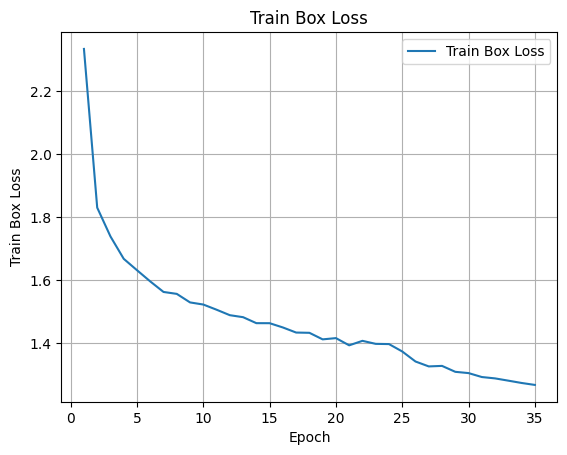

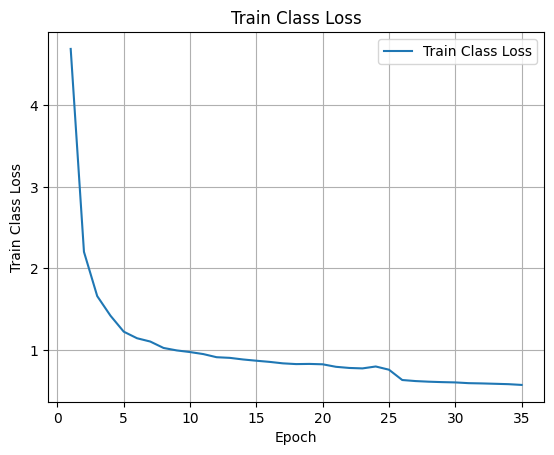

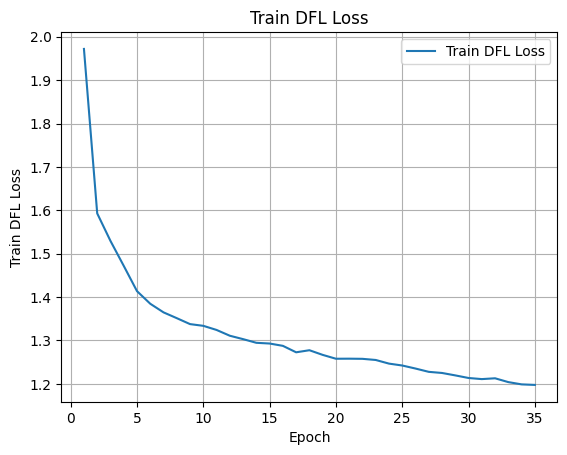

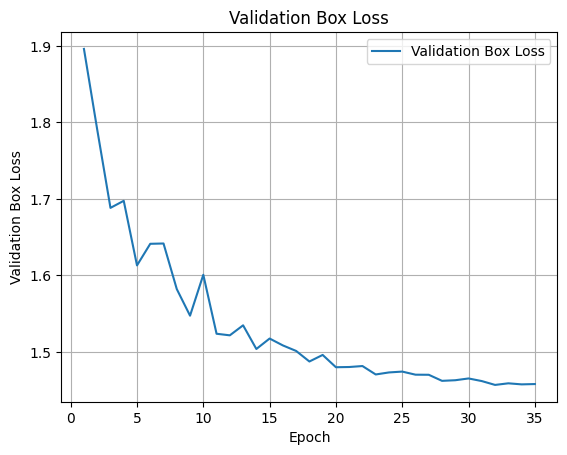

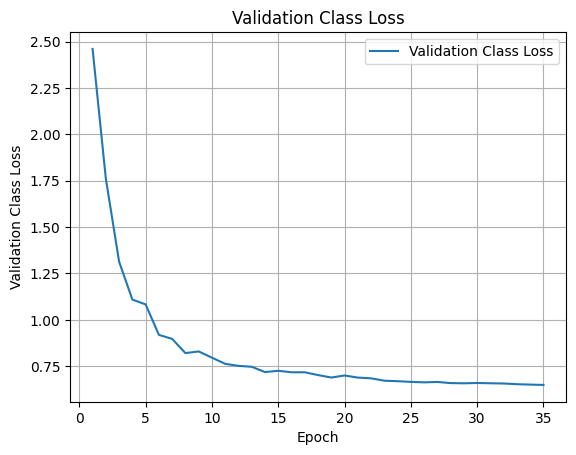

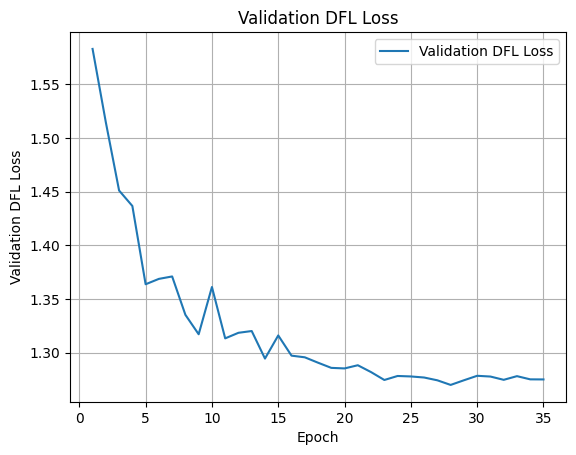

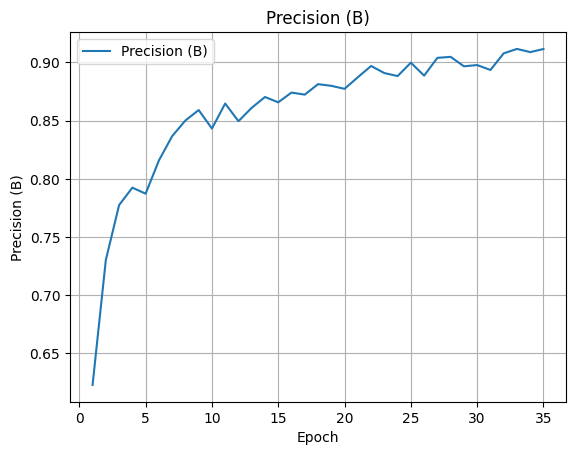

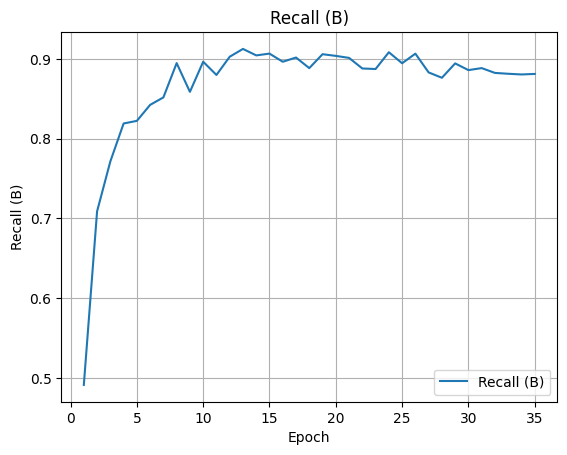

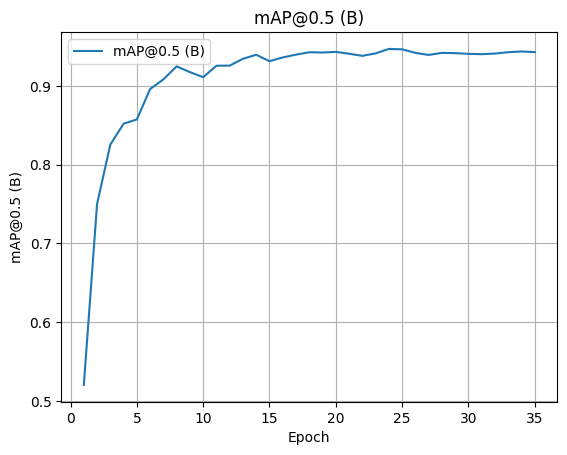

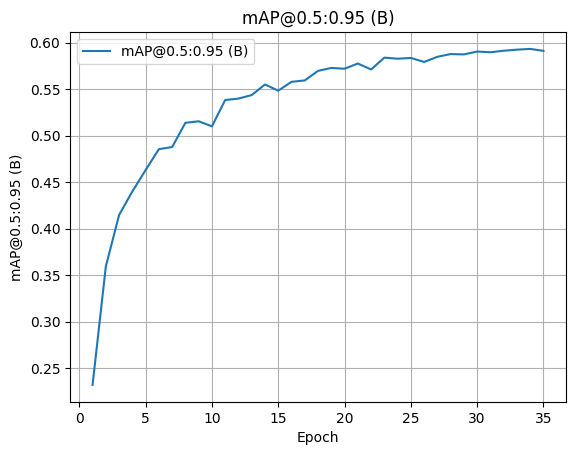


Final Metrics Summary (Last Epoch):
Train Box Loss: 1.2673
Train Class Loss: 0.5740
Train DFL Loss: 1.1974
Validation Box Loss: 1.4580
Validation Class Loss: 0.6491
Validation DFL Loss: 1.2751
Precision (B): 0.9115
Recall (B): 0.8812
mAP@0.5 (B): 0.9428
mAP@0.5:0.95 (B): 0.5912

Improvement Trends:
Train Box Loss: improved (Initial: 2.3337, Final: 1.2673)
Train Class Loss: improved (Initial: 4.6891, Final: 0.5740)
Train DFL Loss: improved (Initial: 1.9720, Final: 1.1974)
Validation Box Loss: improved (Initial: 1.8960, Final: 1.4580)
Validation Class Loss: improved (Initial: 2.4611, Final: 0.6491)
Validation DFL Loss: improved (Initial: 1.5829, Final: 1.2751)
Precision (B): worsened (Initial: 0.6230, Final: 0.9115)
Recall (B): worsened (Initial: 0.4912, Final: 0.8812)
mAP@0.5 (B): worsened (Initial: 0.5202, Final: 0.9428)
mAP@0.5:0.95 (B): worsened (Initial: 0.2319, Final: 0.5912)


In [9]:

try:
    result_metrics = pd.read_csv(results_csv_path)
except FileNotFoundError:
    print(f"File not found: {results_csv_path}")
    exit()


metrics = {
    "Train Box Loss": "train/box_loss",
    "Train Class Loss": "train/cls_loss",
    "Train DFL Loss": "train/dfl_loss",
    "Validation Box Loss": "val/box_loss",
    "Validation Class Loss": "val/cls_loss",
    "Validation DFL Loss": "val/dfl_loss",
    "Precision (B)": "metrics/precision(B)",
    "Recall (B)": "metrics/recall(B)",
    "mAP@0.5 (B)": "metrics/mAP50(B)",
    "mAP@0.5:0.95 (B)": "metrics/mAP50-95(B)",
}

%matplotlib inline

available_metrics = {name: col for name, col in metrics.items() if col in result_metrics.columns}
missing_metrics = [name for name in metrics if name not in available_metrics]

if missing_metrics:
    print(f"Missing metrics: {', '.join(missing_metrics)}")
else:
    print("All expected metrics are present.")

for metric_name, col in available_metrics.items():
    plt.figure()
    plt.plot(result_metrics["epoch"], result_metrics[col], label=metric_name)
    plt.title(metric_name)
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid()
    plt.show()

final_epoch = result_metrics.iloc[-1]
final_metrics = {name: final_epoch[col] for name, col in available_metrics.items()}

print("\nFinal Metrics Summary (Last Epoch):")
for name, value in final_metrics.items():
    print(f"{name}: {value:.4f}")

print("\nImprovement Trends:")
for metric_name, col in available_metrics.items():
    initial = result_metrics[col].iloc[0]
    final = result_metrics[col].iloc[-1]
    trend = "improved" if final < initial else "worsened"
    print(f"{metric_name}: {trend} (Initial: {initial:.4f}, Final: {final:.4f})")


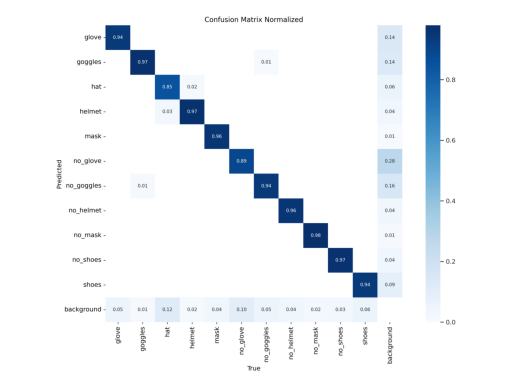

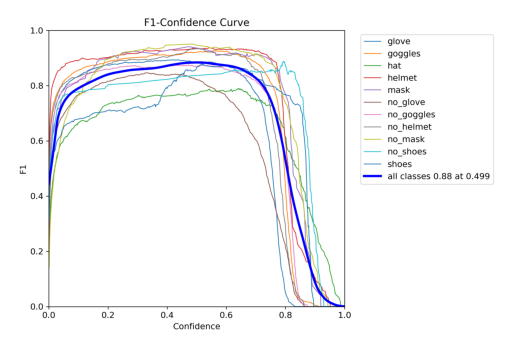

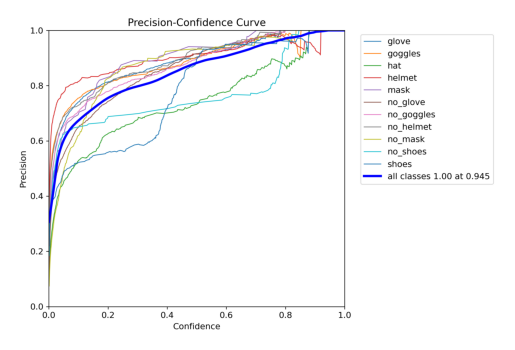

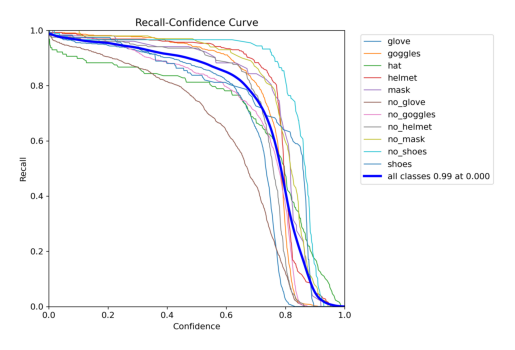

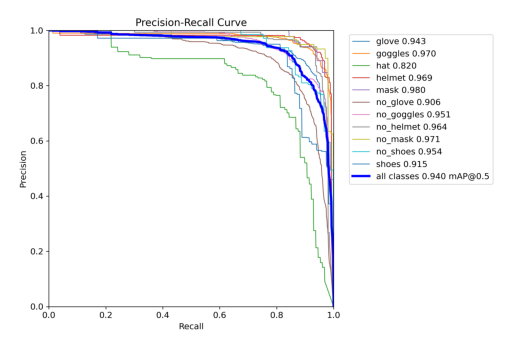

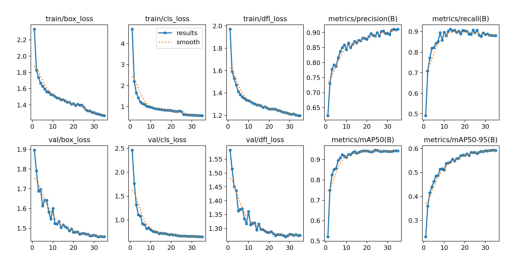

In [10]:


img = mpimg.imread(f"{file_path}/confusion_matrix_normalized.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/F1_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/P_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/R_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/PR_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/results.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

